<a href="https://colab.research.google.com/github/AshutoshJha-007/hatespeech-new-level-multiclassed-sorting-and-breaking-/blob/main/hatespeech_new_level_multiclassed_sorting_and_breaking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
!pip install pandas
import pandas as pd

In [75]:
hin_df = pd.read_excel('/content/new sliced update.xlsx')

In [77]:
print(hin_df.columns.tolist())

['text', 'label', 'hate', 'aggression', 'non hostile', 'vulgar', 'defamation']


In [78]:
print("Total number of hindi texts: ", hin_df['text'].count())


Total number of hindi texts:  10913


In [79]:
hin_df[hin_df.drop(['text', 'label'], axis=1).sum(axis=1) == 0]

,text,label,hate,aggression,non hostile,vulgar,defamation


In [80]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4525
vulgar         2020
defamation     3216
dtype: int64

In [81]:
print('# of not-hate Hindi comments that are classified into other categories:')
hin_df['text'][hin_df.drop(['text', 'label'], axis=1).apply(lambda x: x.sum() > 1 and x['non hostile'] == 1, axis=1)].count()


# of not-hate Hindi comments that are classified into other categories:


0

Text(0.5, 1.0, 'Hindi Text Classes and Their Frequencies')

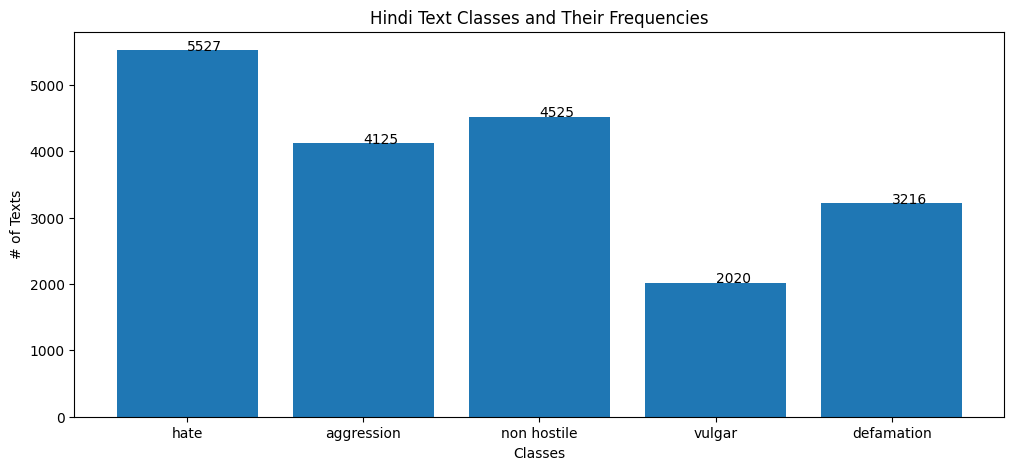

In [82]:

plt.figure(figsize=(12, 5))
plt.bar(hin_df_class_count.index, hin_df_class_count.values)
for i in range(len(hin_df_class_count.index)):
  plt.annotate(
    str(hin_df_class_count.values[i]),
    (
        hin_df_class_count.index[i],
        hin_df_class_count.values[i]
     )
  )
plt.xlabel('Classes')
plt.ylabel('# of Texts')
plt.title('Hindi Text Classes and Their Frequencies')


In [83]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  656


Text(0.5, 1.0, 'Hindi Text Lengths and Their Frequencies')

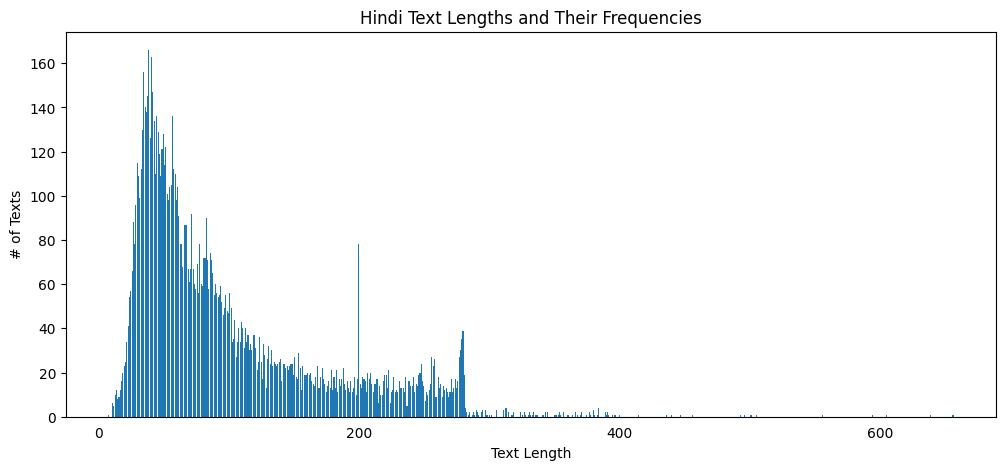

In [84]:
plt.figure(figsize=(12, 5))
plt.bar(hin_text_len.index, hin_text_len.values)
plt.xlabel('Text Length')
plt.ylabel('# of Texts')
plt.xticks([x for x in range(0, hin_text_max_len+1, 200)])
plt.tick_params(bottom=False)
plt.title('Hindi Text Lengths and Their Frequencies')


In [85]:
print('Hindi comments that are missing:')
hin_df[hin_df['text'].apply(lambda x: type(x) != str)]


Hindi comments that are missing:


,text,label,hate,aggression,non hostile,vulgar,defamation


In [86]:
print('# of Hindi Comments with English text:')
hin_df['text'][hin_df['text'].apply(lambda x: re.search('[a-zA-Z]', x) != None)].count()

# of Hindi Comments with English text:


0

In [87]:
# prompt: remove english words from previous index list

english_indexes = list(hin_df['text'][hin_df['text'].apply(lambda x: re.search('[a-zA-Z]', x) != None)].index)
hin_df = hin_df.drop(english_indexes)


In [88]:
print('# of Hindi Comments with English text:')
hin_df['text'][hin_df['text'].apply(lambda x: re.search('[a-zA-Z]', x) != None)].count()


# of Hindi Comments with English text:


0

In [89]:
# prompt: now save the updated csv

hin_df.to_excel('english removed data.xlsx', index=False)

In [90]:
# prompt: now load the new dataset

hin_df = pd.read_excel('/content/english removed data.xlsx')

In [91]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4525
vulgar         2020
defamation     3216
dtype: int64

In [27]:
print('# of Hindi Comments with English text:')
hin_df['text'][hin_df['text'].apply(lambda x: re.search('[a-zA-Z]', x) != None)].count()

# of Hindi Comments with English text:


0

In [28]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5508
aggression     4118
non hostile    4499
vulgar         2020
defamation     3195
dtype: int64

In [ ]:
# prompt: now save the updated csv

hin_df.to_excel('english removed data.xlsx', index=False)


In [29]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  1466


Text(0.5, 1.0, 'Hindi Text Lengths and Their Frequencies')

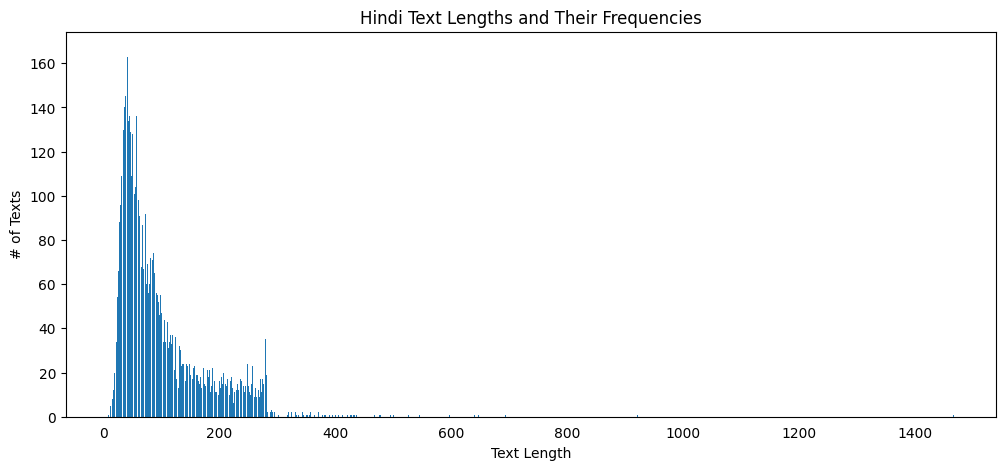

In [30]:
plt.figure(figsize=(12, 5))
plt.bar(hin_text_len.index, hin_text_len.values)
plt.xlabel('Text Length')
plt.ylabel('# of Texts')
plt.xticks([x for x in range(0, hin_text_max_len+1, 200)])
plt.tick_params(bottom=False)
plt.title('Hindi Text Lengths and Their Frequencies')

In [31]:
# prompt: split the text which greater in length than 400text length into 200 text length and create new rows with left over spilted data

def split_text(text):
  if len(text) > 400:
    first_part = text[:200]
    second_part = text[200:]
    return [first_part, second_part]
  else:
    return [text]

hin_df['text'] = hin_df['text'].apply(split_text)
hin_df = hin_df.explode('text')
hin_df.reset_index(drop=True, inplace=True)


In [32]:
# prompt: now save the updated csv

hin_df.to_excel('text length 150 2.0.xlsx', index=False)

In [34]:
# prompt: now load the new dataset

hin_df = pd.read_excel('/content/text length 150 2.0.xlsx')

In [ ]:
# prompt: now save the updated csv

hin_df.to_excel('text length 150.xlsx', index=False)

In [35]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  1266


In [37]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5528
aggression     4126
non hostile    4530
vulgar         2020
defamation     3218
dtype: int64

Text(0.5, 1.0, 'Hindi Text Lengths and Their Frequencies')

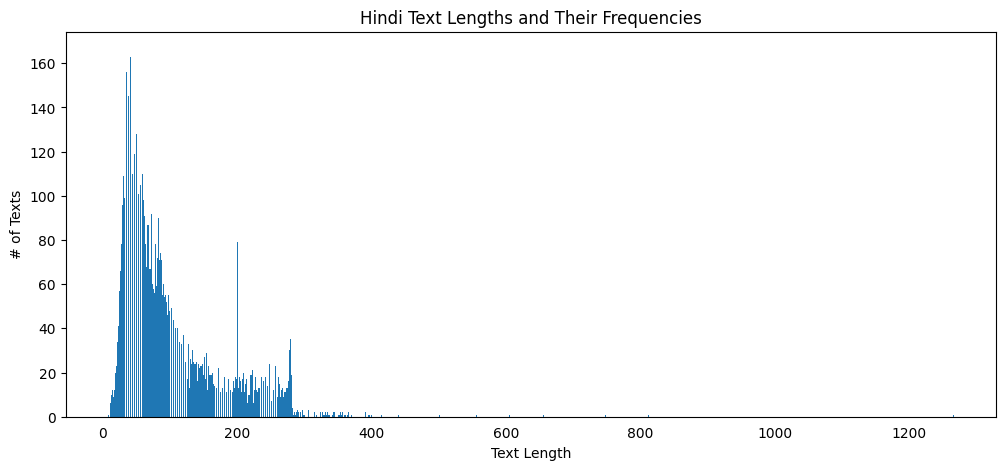

In [36]:
plt.figure(figsize=(12, 5))
plt.bar(hin_text_len.index, hin_text_len.values)
plt.xlabel('Text Length')
plt.ylabel('# of Texts')
plt.xticks([x for x in range(0, hin_text_max_len+1, 200)])
plt.tick_params(bottom=False)
plt.title('Hindi Text Lengths and Their Frequencies')

In [38]:
# prompt: now split the hindi text data into word count of 150 words text length

max_words = 150
hin_df["word_count"] = hin_df["text"].apply(lambda x: len(str(x).split(" ")))
hin_df = hin_df[hin_df["word_count"] <= max_words]
hin_df.drop(columns=["word_count"], inplace=True)


<ipython-input-38-c4ae1d404114>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hin_df.drop(columns=["word_count"], inplace=True)


In [40]:
# prompt: now save the updated csv

hin_df.to_excel('new sliced update.xlsx', index=False)


In [56]:
# prompt: now load the new dataset

hin_df = pd.read_excel('/content/new sliced update.xlsx')


In [57]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  721


In [58]:
hin_df[hin_df.drop(['text', 'label'], axis=1).sum(axis=1) == 0]

,text,label,hate,aggression,non hostile,vulgar,defamation


In [59]:
print('# of not-hate Hindi comments that are classified into other categories:')
hin_df['text'][hin_df.drop(['text', 'label'], axis=1).apply(lambda x: x.sum() > 1 and x['non hostile'] == 1, axis=1)].count()


# of not-hate Hindi comments that are classified into other categories:


0

In [61]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4526
vulgar         2020
defamation     3216
dtype: int64

In [62]:
# prompt: now slice more text length which is more than 150 characters

hin_df = hin_df[hin_df["text"].apply(lambda x: len(str(x).split(" "))) <= 150]
hin_df.to_csv('sliced dataframe newc.csv', index=False)


In [66]:
# prompt: now load the new dataset

hin_df = pd.read_csv('/content/sliced dataframe newc.csv')

In [67]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4526
vulgar         2020
defamation     3216
dtype: int64

In [68]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  721


In [69]:
print(hin_df.columns.tolist())

['text', 'label', 'hate', 'aggression', 'non hostile', 'vulgar', 'defamation']


In [70]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4526
vulgar         2020
defamation     3216
dtype: int64

In [71]:
# prompt: now slice more text length which is more than 150 characters

max_words = 180
hin_df["word_count"] = hin_df["text"].apply(lambda x: len(str(x).split(" ")))
hin_df = hin_df[hin_df["word_count"] <= max_words]
hin_df.drop(columns=["word_count"], inplace=True)

In [72]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  721


In [73]:
print("Hindi dataset is multi-label.")
hin_df_class_count = hin_df.drop(['text', 'label'], axis=1).sum(axis=0)
hin_df_class_count

Hindi dataset is multi-label.


hate           5527
aggression     4125
non hostile    4526
vulgar         2020
defamation     3216
dtype: int64

In [54]:
hin_text_len = hin_df['text'].apply(lambda x: len(str(x))).value_counts()
hin_text_min_len = hin_text_len.index.min()
hin_text_max_len = hin_text_len.index.max()
print("Min hindi text length: ", hin_text_min_len)
print("Max hindi text length: ", hin_text_max_len)

Min hindi text length:  8
Max hindi text length:  722


In [74]:
# prompt: list the cells which have max hindi text length

max_length = hin_df['text'].apply(lambda x: len(str(x))).max()
hin_df[hin_df['text'].apply(lambda x: len(str(x))) == max_length]


,text,label,hate,aggression,non hostile,vulgar,defamation
4823,अंदाजा लगा सकते हैं अपने आप को जनता का सेवक औ...,non hostile,0,0,1,0,0
